<a href="https://colab.research.google.com/github/petedanN/DL-Diabetes-Progression-Model/blob/main/ANN_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modules**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


# **Loading and Preprocessing**

In [41]:
# Load the Diabetes dataset from Sklearn
diabetes_data = load_diabetes()
print(diabetes_data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [43]:
# creating the data frame
df=pd.DataFrame(data=diabetes_data.data,columns=diabetes_data.feature_names)
# adding the target varaible to the dataframe
df['target']=diabetes_data.target

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp

# **Exploratory Data Analysis (EDA)**

In [48]:
df.shape

(442, 11)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [49]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [50]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [32]:
missing_values = X.isnull().sum().sum()
missing_values

0

In [52]:
df.duplicated().sum()

0

In [54]:
# Normalize the features
scaler=MinMaxScaler()
df[df.columns[:-1]]=scaler.fit_transform(df[df.columns[:-1]])
print(df.head())

        age  sex       bmi        bp        s1        s2        s3        s4  \
0  0.666667  1.0  0.582645  0.549296  0.294118  0.256972  0.207792  0.282087   
1  0.483333  0.0  0.148760  0.352113  0.421569  0.306773  0.623377  0.141044   
2  0.883333  1.0  0.516529  0.436620  0.289216  0.258964  0.246753  0.282087   
3  0.083333  0.0  0.301653  0.309859  0.495098  0.447211  0.233766  0.423131   
4  0.516667  0.0  0.206612  0.549296  0.465686  0.417331  0.389610  0.282087   

         s5        s6  target  
0  0.562217  0.439394   151.0  
1  0.222437  0.166667    75.0  
2  0.496578  0.409091   141.0  
3  0.572923  0.469697   206.0  
4  0.362385  0.333333   135.0  


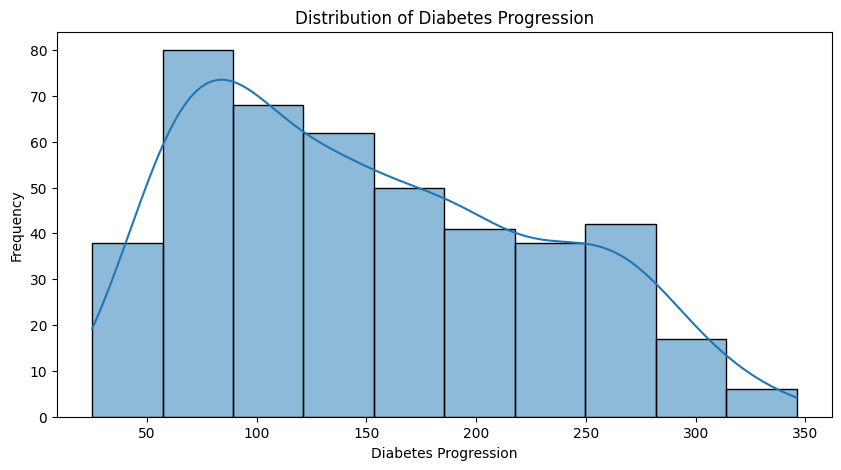

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(y, kde=True)
plt.title('Distribution of Diabetes Progression')
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')
plt.show()

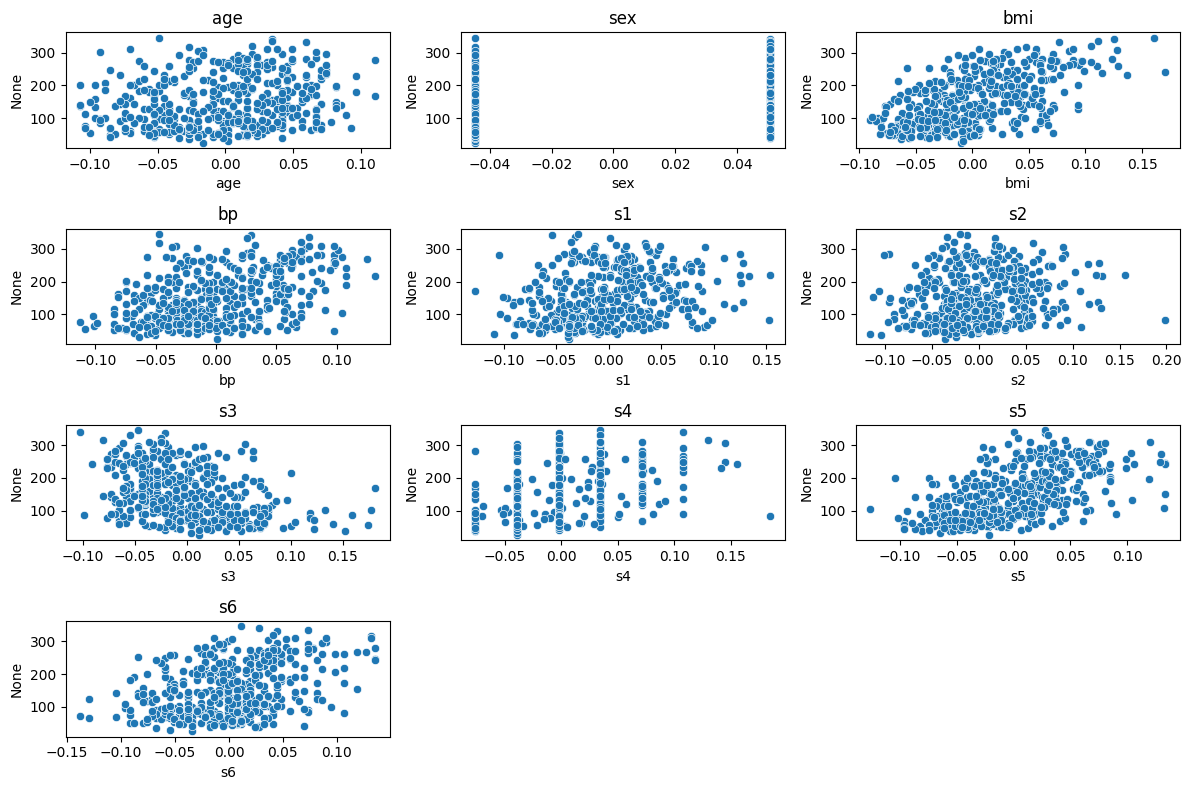

In [56]:
# Visualize relationships between features and the target variable
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=X[feature], y=y)
    plt.title(feature)
plt.tight_layout()
plt.show()

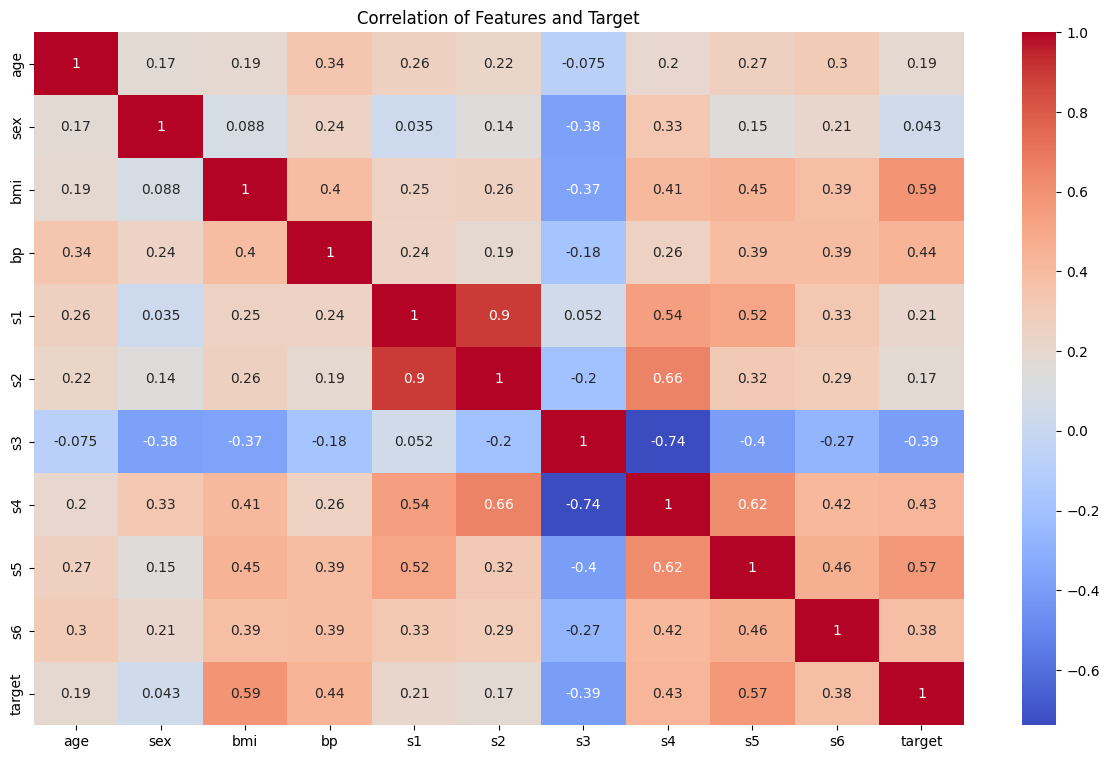

In [57]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation of Features and Target")
plt.show()

# **Building the ANN Model**

In [ ]:
x=df.drop(columns=['target']) # features
y=df['target'] ## target variable

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(50,activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

# **Training the ANN Model**

In [62]:
# Train the model
history=model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 30733.1309 - mean_absolute_error: 156.3859
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30840.1289 - mean_absolute_error: 157.8425 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28430.6875 - mean_absolute_error: 150.7030 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26496.7207 - mean_absolute_error: 144.1162 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27147.8848 - mean_absolute_error: 146.0821 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24287.9688 - mean_absolute_error: 135.5852 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24968.9082 - mean_absolute_error: 137.4828  
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21816.2227 - mean_absolute_error: 126.9472 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20683.9727 - mean_absolute_error: 121.7668 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14540.9111 - 

# **Evaluating the Model**

In [64]:
# Predicting the model
y_pred=model.predict(x_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

loss_mae = model.evaluate(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE : {mae}')
print(f'MSE : {mse}')
print(f'R2  : {r2}')
print(f'loss: {loss_mae[0]}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3100.2302 - mean_absolute_error: 46.1010  
MAE : 44.780005380008994
MSE : 2918.935874897791
R2  : 0.4490652564424854
loss: 2918.935791015625


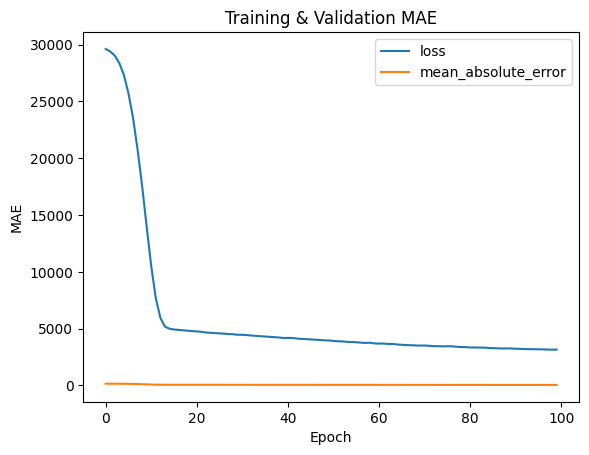

In [65]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.title('Training & Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# **Improving the Model**

In [67]:
# Improved ANN model
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])
history=model.fit(x_train, y_train, epochs=150, batch_size=40, verbose=1)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 30144.3086 - mean_absolute_error: 154.5583
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 30234.7988 - mean_absolute_error: 156.3699
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29410.7910 - mean_absolute_error: 154.0998
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28776.3867 - mean_absolute_error: 150.6408
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27481.5020 - mean_absolute_error: 146.4738
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27155.1543 - mean_absolute_error: 145.0678
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21927.5508 - mean_absolute_error: 128.6031
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19040.9355 - mean_absolute_error: 116.4401
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15290.2754 - mean_absolute_error: 100.1749 
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9244.7090 - mean_absolute_error: 73

In [68]:
# Predicting the model
y_pred=model.predict(x_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Report the performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² Score: {r2:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Mean Squared Error (MSE): 2906.8682
R² Score: 0.4513
